# **Rafsanjan restaurants analysis**

## Objects:

*   Reading the restaurant data based in Rafsanjan
*   Data understanding
*   Data preparation
*   Adding new columns as new metrics
*   Calculating KPIs
*   Analysis and Visualization of the data








In this project, we have gathered a dataset of the restaurants based in Rafsanjan city. The restaurant's information includes the restaurant's name, google rate, number of reviews, location details on Google Maps, and the address of the restaurant.


#### Import necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step1. Reading the Rafsanjan's restaurant dataset.

In [5]:
# reading dataset
data = pd.read_excel("/content/restaurants_data.xlsx")

# looking at the 5 top rows of the dataset
data.head()

,Restaurant,Rating,Reviews,Location,Address
0,Shabhaye kavir,5.0,2.0,"30.401898356081382, 55.98609652041362",62-Taleghani
1,Golha,3.5,18.0,"30.39277345603133, 55.998903219864964",13-Taleghani
2,Tahchin,4.0,5.0,"30.39193978839676, 56.0115383913069",0-Moghimi
3,Shahrzad,4.2,12.0,"30.404012160146223, 55.99727206343508",0-Emam Khomeini
4,Karen,4.1,16.0,"30.396242680209244, 55.988202421977675",0-Jomhoriye Eslami


## Step2. Understanding data

In [6]:
# looking at the shape of the dataset (number of rows & columns)
data.shape

(166, 5)

As seen, the dataset has 166 rows and 4 columns.

In [7]:
# looking at some statistics about the dataset
data.describe()

,Rating,Reviews
count,113.000000,113.000000
mean,4.105310,6.150442
std,0.874729,13.817833
min,1.000000,1.000000
25%,3.700000,1.000000
50%,4.000000,2.000000
75%,5.000000,5.000000
max,5.000000,100.000000


As seen;

*   we have 113 rows with Rating and Reviews columns being filled.
*   The average of the Ratings and Reviews is 4.10, and 6.15, respectively.
*   The minimum of Ratings and Reviews is 1, and 1, respectively.

*   The maximum of Ratings and Reviews is 5, and 100, respectively.






In [8]:
# some information about the values of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  166 non-null    object 
 1   Rating      113 non-null    float64
 2   Reviews     113 non-null    float64
 3   Location    166 non-null    object 
 4   Address     166 non-null    object 
dtypes: float64(2), object(3)
memory usage: 6.6+ KB


We can conclude that we have 53 rows in the dataset that have NULL values in the Rating and Reviews columns that must be removed as they will not help us in our analysis.

## Step3. Data preparation and cleaning

In [9]:
# finding the rows that have NULL values
NaN_data = data[data["Rating"].isnull()]

#  number of the rows having NULL values in Rating column
print(NaN_data.count())

# showing top 5 rows of the NaN_data dataset
NaN_data.head()

Restaurant    53
Rating         0
Reviews        0
Location      53
Address       53
dtype: int64


,Restaurant,Rating,Reviews,Location,Address
24,Afshin,NaN,NaN,"30.408404518978553, 55.99373397072496",0-Enghelab
25,Alma,NaN,NaN,"30.39906406317216, 55.99348910603776",0-17 Sharivar
27,Mazzeh sandwich,NaN,NaN,"30.410474872728205, 56.00398173197845",0-Koohbanan
31,Chashni,NaN,NaN,"30.39695045521141, 55.97555674255613",0-Motahari
35,Mehdi,NaN,NaN,"30.391830489782908, 55.96831441936093",0-Motahari


So we have 53 rows with NULL values to be removed as mentioned earlier.

In [10]:
# dropping rows with NULL values
data.dropna(how="any",subset=["Rating"],axis=0, inplace=True)

# looking at the shape of the dataset after dropping rows
data.shape

(113, 5)

As seen above, 113 rows have remained after dropping 53 rows.

In [11]:
# checking the data types of each column
data.dtypes

Restaurant     object
Rating        float64
Reviews       float64
Location       object
Address        object
dtype: object

In [12]:
# converting the data type of the column "Reviews" into int64
data["Reviews"] = data["Reviews"].astype("int64")
data.dtypes

Restaurant     object
Rating        float64
Reviews         int64
Location       object
Address        object
dtype: object

In [13]:
# checking for any duplicated records in the dataset
data.duplicated(subset=["Restaurant"]).any()

False

As seen, there are no duplicated records even with duplicated names.

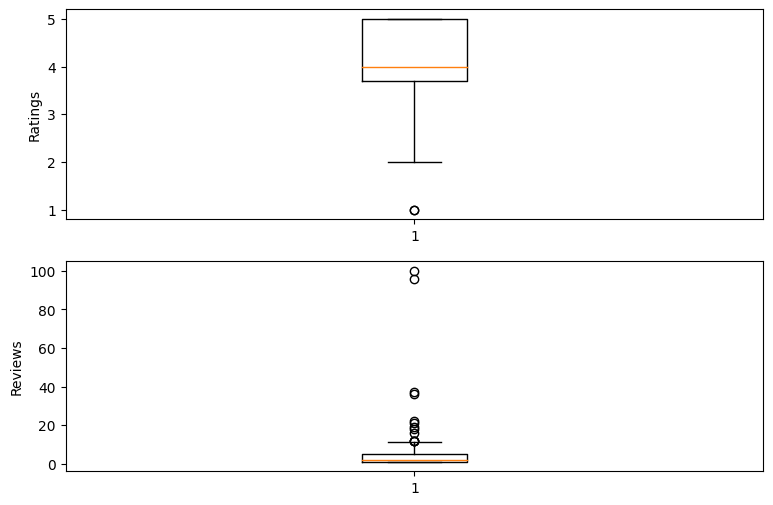

In [14]:
# checking for any outliers
plt.figure(figsize=(9,6))
plt.subplot(2,1,1)
plt.boxplot(data["Rating"])
plt.ylabel("Ratings")

plt.subplot(2,1,2)
plt.boxplot(data["Reviews"])
plt.ylabel("Reviews")

plt.show()



As seen above, there are no outliers in the "Rating" and "Reviews" columns.

## Step4. Adding new columns as new metrics

### A. "Customer satisfaction score"

1.   First, we have to define a function to read the Rating column and then return a score based on the value of the Rating, ranging from A to E.
2.   Then, we pass the function to the mentioned column in the dataset by the "apply" method in pandas.



In [15]:
# defining the fun_CSS() function
def fun_CSS(rating):
  if ( rating >4 and rating <=5):
    return "A"
  elif ( rating >3 and rating <=4 ):
    return "B"
  elif ( rating >2 and rating <=3 ):
    return "C"
  elif ( rating >1 and rating <=2 ):
    return "D"
  elif ( rating >=0 and rating <=1 ):
    return "E"


In [16]:
# Adding a "Customer satisfaction score" column by "fun_CSS()"

# this line doesnt let to rebuild the score column again if you run this cell any more times
if not("Customer Satisfaction Score" in data.columns) :

  # adding the score column to the dataset by "apply" method
  data["Customer Satisfaction Score"] = data["Rating"].apply(lambda x: fun_CSS(x))

# looking at the top 10 rows of the dataset
data.head(10)

,Restaurant,Rating,Reviews,Location,Address,Customer Satisfaction Score
0,Shabhaye kavir,5.0,2,"30.401898356081382, 55.98609652041362",62-Taleghani,A
1,Golha,3.5,18,"30.39277345603133, 55.998903219864964",13-Taleghani,B
2,Tahchin,4.0,5,"30.39193978839676, 56.0115383913069",0-Moghimi,B
3,Shahrzad,4.2,12,"30.404012160146223, 55.99727206343508",0-Emam Khomeini,A
4,Karen,4.1,16,"30.396242680209244, 55.988202421977675",0-Jomhoriye Eslami,A
5,Tavakol,4.1,100,"30.407910161503093, 55.989260992803786",7-Shohada,A
6,Kondez,3.3,3,"30.406097884595923, 56.005636569217025",0-Eghtesad,B
7,Konj golestan amin,4.2,9,"30.404244729973843, 55.993061783319405",0-Beheshti,A
8,Zarrin mashregh zamin,3.9,21,"30.395004826468057, 56.00568262136722",0-Emam Khomeini,B
9,Top tanoor,4.6,7,"30.38884559639454, 55.998733728993216",0-Abuzar,A


### B. "Street"

In this part, we want to add a column to the dataset that holds only the street name of the address. So, we can group the restaurants by their street later in our analysis.

1.   First, we have to define the function that splits the address by "-" and returns the street name.
2.   Then, we have to apply that function to the "Address" colmn in the dataset.



In [17]:
# defining the "get_street()" function
def get_street(address):
  return address.split("-")[1]

In [18]:
# applying the function by "apply" method
if not("Street" in data.columns) :
  data["Street"] = data["Address"].apply (lambda x: get_street(x))
data.head()

,Restaurant,Rating,Reviews,Location,Address,Customer Satisfaction Score,Street
0,Shabhaye kavir,5.0,2,"30.401898356081382, 55.98609652041362",62-Taleghani,A,Taleghani
1,Golha,3.5,18,"30.39277345603133, 55.998903219864964",13-Taleghani,B,Taleghani
2,Tahchin,4.0,5,"30.39193978839676, 56.0115383913069",0-Moghimi,B,Moghimi
3,Shahrzad,4.2,12,"30.404012160146223, 55.99727206343508",0-Emam Khomeini,A,Emam Khomeini
4,Karen,4.1,16,"30.396242680209244, 55.988202421977675",0-Jomhoriye Eslami,A,Jomhoriye Eslami


## Step5. Calculating KPIs

### A. Average Rating

In [20]:
# Calculating a KPI named "Average Rating"
average_rating = data['Rating'].mean()
print(f"Rafsanjan average rating is: {average_rating: .2f}")

Rafsanjan average rating is:  4.11


The average rating for Rafsanjan is 4.11.




### B. Positive Reviews Percentage

In [21]:
# Defining threshold for positive reviews
positive_threshold = 4

# Calculating Percentage of Positive Reviews
positive_reviews_percentage = (data['Rating'] >= positive_threshold).sum() / len(data) * 100
print(f"Percentage of Positive Reviews: {positive_reviews_percentage: .2f}%")


Percentage of Positive Reviews:  65.49%


The Percentage of Positive Reviews for Rafsanjan is 65.49%.

## Step6. Analysis and Visualization of the data


### A. Rafsanjan restaurants by customer satisfaction score

In [22]:
# grouping restaurants by "Customer Satisfaction Score"
results = data.groupby("Customer Satisfaction Score").count()
results

,Restaurant,Rating,Reviews,Location,Address,Street
Customer Satisfaction Score,,,,,,
A,55,55,55,55,55,55
B,45,45,45,45,45,45
C,8,8,8,8,8,8
D,3,3,3,3,3,3
E,2,2,2,2,2,2


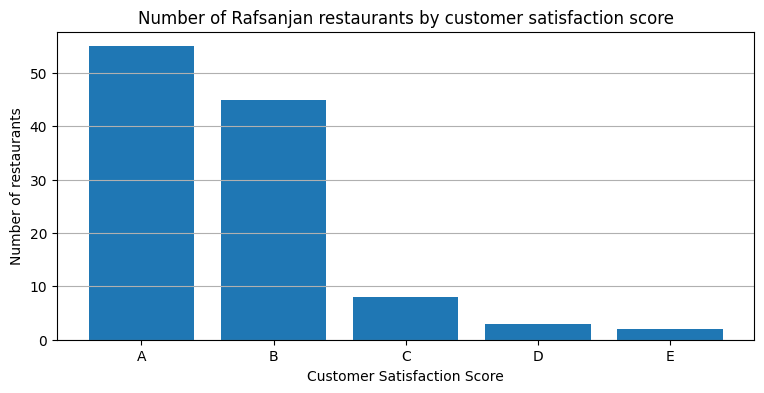

In [125]:
# plotting the above information
plt.figure(figsize=(9,4))
plt.bar(results.index,results['Restaurant'])
plt.xticks(results.index)
plt.ylabel('Number of restaurants')
plt.xlabel('Customer Satisfaction Score')
plt.title("Number of Rafsanjan restaurants by customer satisfaction score")
plt.grid(axis='y')
plt.show()

### B. Rafsanjan restaurants by street.

In [30]:
# grouping restaurants by "Street"
results = data.groupby("Street").count().sort_values("Restaurant",ascending=False)
results.head()

,Restaurant,Rating,Reviews,Location,Address,Customer Satisfaction Score
Street,,,,,,
Taleghani,18,18,18,18,18,18
Motahari,15,15,15,15,15,15
Mostafa Khomeini,5,5,5,5,5,5
Beheshti,5,5,5,5,5,5
Abuzar,4,4,4,4,4,4


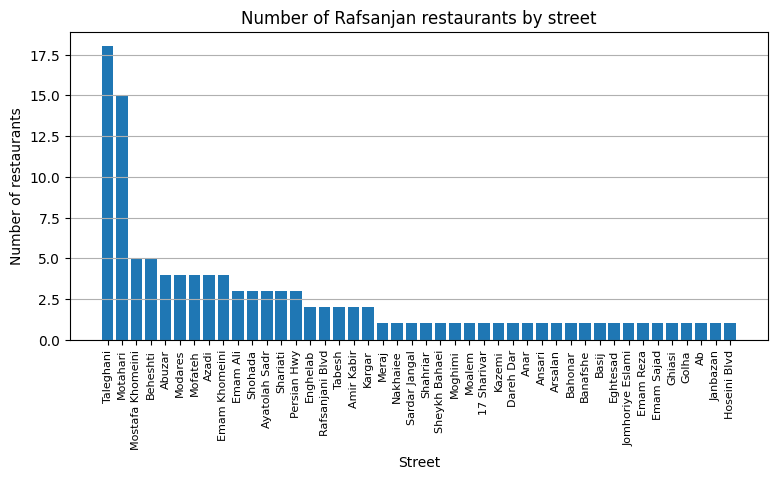

In [32]:
# plotting the above information
plt.figure(figsize=(9,4))
plt.bar(results.index,results['Restaurant'])
plt.xticks(results.index,rotation='vertical', size=8)
plt.ylabel('Number of restaurants')
plt.xlabel('Street')
plt.title("Number of Rafsanjan restaurants by street")
plt.grid(axis='y')
plt.show()

In [33]:
# transforming data into an Excel file for further analysis in PowerBI
data.to_excel("./restaurants_data_processed.xlsx")